In [505]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [506]:
#Here we are setting the paths

In [507]:
path_w = Path('whale_returns.csv')
path_a = Path('algo_returns.csv')
path_sp = Path('sp_tsx_history.csv')

In [508]:
#Here we are importing the CSV files and setting them to datetime format

In [509]:
whale = pd.read_csv(path_w, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo = pd.read_csv(path_a, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp = pd.read_csv(path_sp, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [510]:
#Whale Returns
#The code below will be reading the whale portfolio and cleaning the data

In [511]:
whale

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [512]:
#Here we are counting the amount of null values in the whale portfolio

In [513]:
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [514]:
#Here we are dropping the null values in whale

In [515]:
whale_new = whale.dropna()

In [516]:
#Now we check to see if all null values are dropped

In [517]:
whale_new.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [518]:
#Now we are reading the daily returns of algo

In [519]:
algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [520]:
#Here we are counting all the null values

In [521]:
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [522]:
#Now we are dropping these null values

In [523]:
algo_new = algo.dropna()

In [524]:
#Now we check to see if there are any remaining null values

In [525]:
algo_new.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [526]:
#Here we are reading the S&P data

In [527]:
sp.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [528]:
#Here we will be checking the data types in sp

In [529]:
sp.dtypes

Close    object
dtype: object

In [530]:
#Here we will be converting the object type in sp into a float
#First we have to remove the commas and $ in the Close column to avoid an error when changing the type

In [531]:
sp['Close'] = sp['Close'].str.replace(',', '')
sp['Close'] = sp['Close'].str.replace('$', '', regex = True)

In [532]:
sp.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [533]:
#Now we can use the astype function to change the type, and we then check to confirm it is a float

In [534]:
sp_float = sp['Close'].astype(float)
sp_float.dtypes

dtype('float64')

In [535]:
#Now we must calculate the daily returns

In [536]:
daily_returns = sp_float.pct_change()
daily_returns

Date
2012-10-01         NaN
2012-10-02    0.001701
2012-10-03   -0.002563
2012-10-04    0.007137
2012-10-05   -0.002305
                ...   
2019-12-20    0.003188
2019-12-23    0.000600
2019-12-24    0.003003
2019-12-27   -0.000695
2019-12-30   -0.004057
Name: Close, Length: 1818, dtype: float64

In [537]:
#Now we must drop the null values, first we will check for nulls and then drop them

In [538]:
daily_returns.isnull().sum()

1

In [539]:
daily_returns = daily_returns.dropna()

In [540]:
#Now we can check to see if the daily returns have any nulls

In [541]:
daily_returns.isnull().sum()


0

In [542]:
#Now we must rename the close column to S&P TSX

In [543]:
daily_returns_spdf = daily_returns.to_frame()
daily_returns_spdf.columns = ['S&P TSX']
daily_returns_spdf.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [544]:
#Now we must join all the dataframes together into one

In [545]:
all_data = pd.concat([algo_new, whale_new, daily_returns_spdf], axis = "columns", join = 'inner')
all_data

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.008530
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.003371
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001344
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.009972
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,0.000682,-0.007247,-0.000285,-0.001291,-0.005153,0.004848,-0.000628
2019-04-26,0.002981,0.005256,0.008149,0.009162,0.012355,0.010434,0.002254
2019-04-29,0.005208,0.002829,0.001254,0.002719,0.006251,0.005223,-0.000788


In [546]:
#The code below will be plotting the daily returns of all the data

<AxesSubplot:title={'center':'Daily Returns of All Portfolios'}, xlabel='Date'>

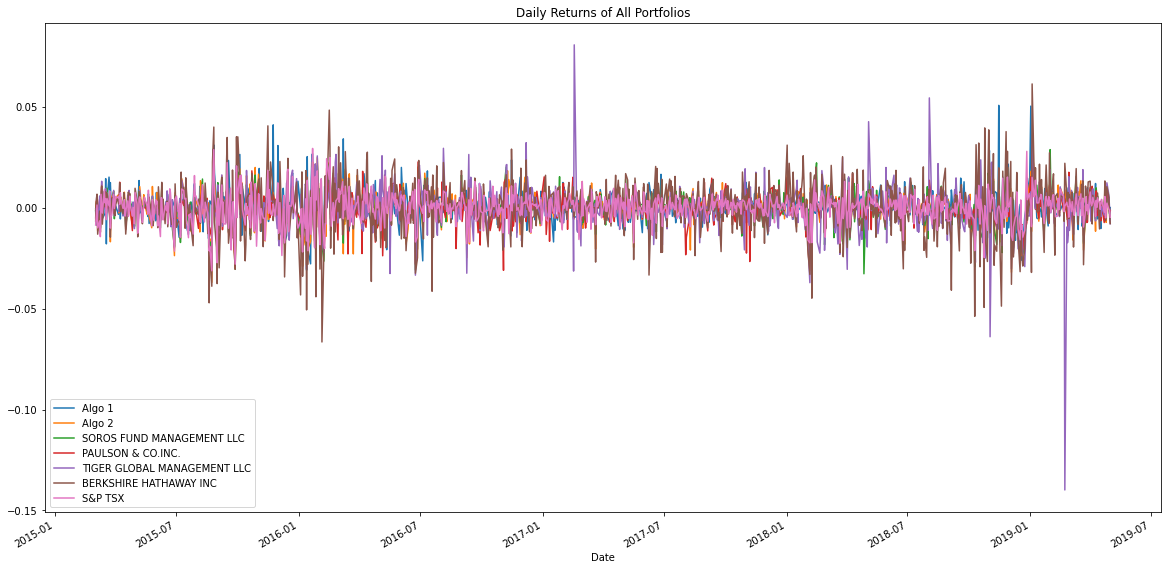

In [547]:
all_data.plot(figsize = (20,10), title = 'Daily Returns of All Portfolios')

In [548]:
#Here we will be calculating the cumulative return of the all data portfolio

In [549]:
cumulative_returns = (1 + all_data).cumprod()
cumulative_returns

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX
Date,,,,,,,
2015-03-03,0.998058,0.999051,0.998734,0.995019,0.999504,0.993431,0.991470
2015-03-04,0.989486,1.001464,1.000962,0.998245,0.996972,0.997617,0.988128
2015-03-05,0.988541,1.005794,1.004981,1.002314,0.999319,1.004327,0.989456
2015-03-06,0.983641,0.994267,0.997037,0.998731,0.990844,0.991172,0.979589
2015-03-09,0.978283,0.995563,0.997617,1.002951,0.996633,0.989534,0.973168
...,...,...,...,...,...,...,...
2019-04-25,2.011144,1.196390,1.118163,0.754821,0.840272,1.348932,1.070504
2019-04-26,2.017139,1.202677,1.127275,0.761736,0.850654,1.363007,1.072916
2019-04-29,2.027645,1.206080,1.128689,0.763808,0.855971,1.370126,1.072071


In [550]:
#Now we will create a box plot for the different portfolios for all the portfolios

<AxesSubplot:>

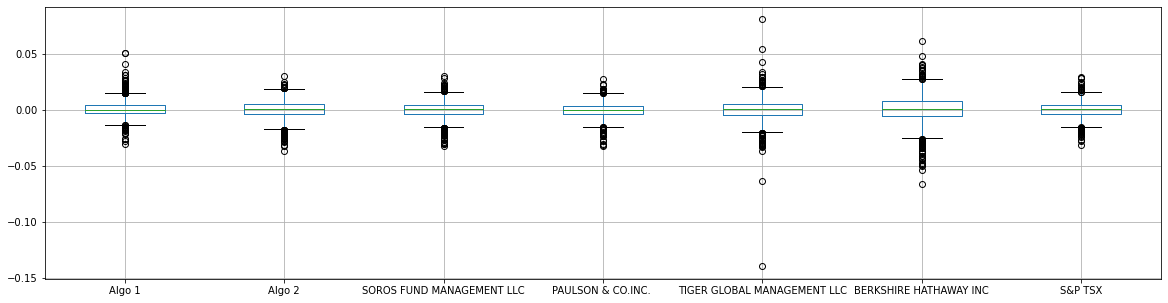

In [552]:
all_data.boxplot(figsize = (20,5))

In [557]:
#Now we are calculating the standard deviation of the S&P TSX 60

In [558]:
std_sp60 = daily_returns_spdf.std()
print(std_sp60)

S&P TSX    0.006637
dtype: float64


In [559]:
#Now we must determine which portfolios are riskier

In [560]:
#First we have to calculate the STD for the other two portfolios

In [561]:
std_whale = (whale_new.std().sum())/4
std_whale

0.009618471706059247

In [562]:
std_algo = (algo_new.std().sum())/4
std_algo

0.004113543738657199

In [563]:
print('The risk of the portfolios is highest risk: Whale portfolio, Medium risk: S&P TSX protfolio, and lastly lowest risk: Algo portfolio.')


The risk of the portfolios is highest risk: Whale portfolio, Medium risk: S&P TSX protfolio, and lastly lowest risk: Algo portfolio.


In [564]:
#Now we must calculate the annualized standard deviation

In [565]:
#First we must start with getting the standard deviation of all data

In [566]:
all_data_std = all_data.std()
all_data_std

Algo 1                         0.007589
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
S&P TSX                        0.007034
dtype: float64

In [567]:
#Now we calculate annualized std

In [568]:
annualized_std = all_data_std * np.sqrt(252)
annualized_std

Algo 1                         0.120470
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
S&P TSX                        0.111664
dtype: float64

In [569]:
#Now we are calculating and plotting the rolling std for all portfolios

In [570]:
#First we must calculate rolling standard deviation for all portfolios in a 21 day window

In [571]:
all_data_rolling_std = all_data.rolling(window = 21).std()
all_data_rolling_std

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.005801,0.005764,0.004145,0.005572,0.004917,0.006641,0.003370
2019-04-26,0.005562,0.005700,0.004117,0.005649,0.005424,0.006599,0.003321
2019-04-29,0.005251,0.005622,0.004123,0.005374,0.005438,0.006584,0.003356


In [572]:
#Now we are plotting the rolling std

<AxesSubplot:xlabel='Date'>

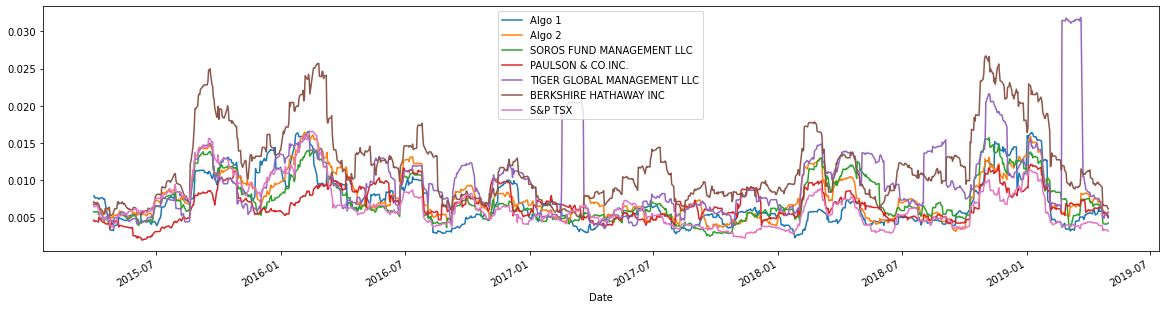

In [573]:
all_data_rolling_std.plot(figsize = (20, 5))

In [574]:
#Now we must calculate the correlation and plot it

<AxesSubplot:>

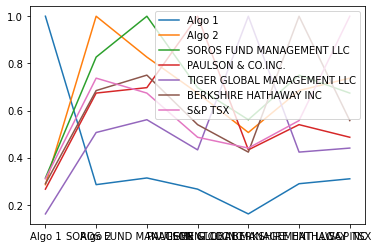

In [575]:
all_data.corr().plot()

In [576]:
#Next we are calculating the the covariance of a single portfolio

In [577]:
#Here we chose the Berkshire protfolio from the whale portfolio

In [578]:
rolling_covariance_berkshire = all_data['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(all_data['BERKSHIRE HATHAWAY INC'])
rolling_covariance_berkshire

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000096
2019-04-26    0.000086
2019-04-29    0.000084
2019-04-30    0.000085
2019-05-01    0.000084
Name: BERKSHIRE HATHAWAY INC, Length: 1029, dtype: float64

In [579]:
#Now we are calculating the variance of S&P TSX

In [580]:
rolling_variance_sptsx = all_data['S&P TSX'].rolling(window = 60).var()
rolling_variance_sptsx

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX, Length: 1029, dtype: float64

In [581]:
#Now we have to compute the beta

In [582]:
rolling_beta = rolling_covariance_berkshire / rolling_variance_sptsx
rolling_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    6.371234
2019-04-26    5.742587
2019-04-29    5.595906
2019-04-30    5.670816
2019-05-01    5.609578
Length: 1029, dtype: float64

In [583]:
#Plot the Beta trend

<AxesSubplot:title={'center':'Rolling 60 Day Beta of Berkshire and S&P TSX'}, xlabel='Date'>

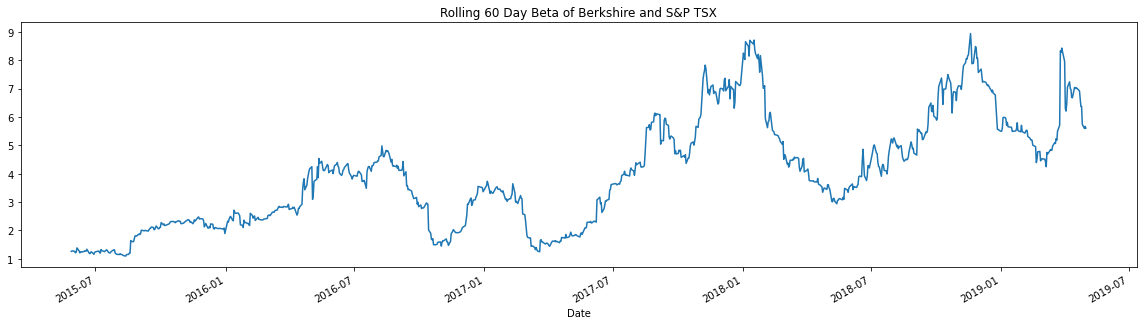

In [584]:
rolling_beta.plot(figsize = (20,5), title = 'Rolling 60 Day Beta of Berkshire and S&P TSX')

In [585]:
#Now we caluclate the annualized sharpe ratios

In [586]:
sharpe_ratio = (all_data.mean() * 252) / (all_data.std() * np.sqrt(252))
sharpe_ratio

Algo 1                         1.491514
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
S&P TSX                        0.195550
dtype: float64

In [587]:
#Now we plot the sharpe ratio as a bar plot

<AxesSubplot:>

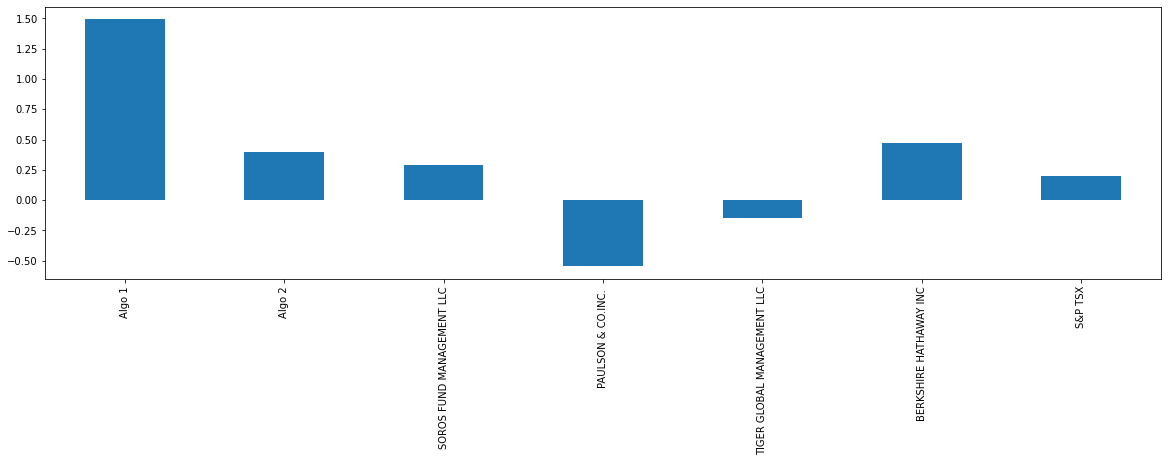

In [588]:
sharpe_ratio.plot(kind = 'bar', figsize = (20,5))

In [589]:
print('The algorithmic portfolios out perform both the S&P TSX 60 and the whales portfolio because the algo sharpe ratio is higher')

The algorithmic portfolios out perform both the S&P TSX 60 and the whales portfolio because the algo sharpe ratio is higher


In [590]:
#Now we will be using the custom stock portfolio

In [591]:
path_shop = Path('shop_historical.csv')
path_otex = Path('otex_historical.csv')
path_l = Path('l_historical.csv')

In [592]:
shop = pd.read_csv(path_shop, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex = pd.read_csv(path_otex, index_col="Date", infer_datetime_format=True, parse_dates=True)
l = pd.read_csv(path_l, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [593]:
#Now we will read the data from all three stock portfolios

In [594]:
shop.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [595]:
otex.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [596]:
l.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [597]:
#Now we will combine all the stock into one dataframe

In [598]:
all_stocks = pd.concat([shop, otex, l], axis = 'columns', join = 'inner')
all_stocks.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [599]:
#Now we will be organizing the data by symbol

In [600]:
final_stock_data = all_stocks.drop(columns = 'Symbol')
final_stock_data.columns = ['SHOP', 'OTEX', 'L']
final_stock_data.head()

,SHOP,OTEX,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86


In [601]:
#Now we will calculate the daily returns

In [602]:
daily_returns_stocks = final_stock_data.pct_change()
daily_returns_stocks

,SHOP,OTEX,L
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
...,...,...,...
2019-12-20,-0.005503,0.024441,0.003547
2019-12-23,-0.003118,-0.013463,-0.003240
2019-12-24,0.026915,-0.007773,-0.000148


In [603]:
#Now we will drop NAs

In [604]:
daily_returns_stocks = daily_returns_stocks.dropna()

In [605]:
#Now we will check if there are any null values left

In [606]:
daily_returns_stocks.isnull().sum()

SHOP    0
OTEX    0
L       0
dtype: int64

In [607]:
#Now that there are no null values we can display the data

In [608]:
daily_returns_stocks.head()

,SHOP,OTEX,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


In [609]:
#Now we must calculate the weighted returns for the portfolio

In [610]:
#First we must set the weights

In [611]:
weights = [1/3, 1/3, 1/3]

In [612]:
#Now we can calculate the the portfolio return with the weights

In [613]:
portfolio_return_weight = daily_returns_stocks.dot(weights)
portfolio_return_weight

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
                ...   
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
Length: 500, dtype: float64

In [614]:
#Now we can add the new portfolio return data to the original data

In [615]:
#Before we do this we must turn portfolio_return_weight back into a Data frame, and rename the column

In [616]:
custom_table = portfolio_return_weight.to_frame()
custom_table.columns = ['Custom Portfolio']
custom_table.head()

,Custom Portfolio
Date,
2018-01-03,0.000565
2018-01-04,0.004517
2018-01-05,-0.003126
2018-01-08,-0.000997
2018-01-09,-0.000999


In [617]:
#Now we can combine the all_data data frame with the custom_table dataframe

In [618]:
final_table = pd.concat([all_data, custom_table], axis = 'columns', join = 'inner')
final_table.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX,Custom Portfolio
Date,,,,,,,,
2018-01-03,-0.000890,0.008175,0.004658,0.000027,0.001979,0.005676,0.003774,0.000565
2018-01-04,-0.000914,0.004294,-0.000914,0.004196,0.010743,0.004065,0.002528,0.004517
2018-01-05,-0.003839,0.006405,0.004072,0.000823,0.000737,0.022023,-0.003869,-0.003126
2018-01-08,0.001653,0.000658,0.004473,-0.003739,0.005085,0.003435,-0.001944,-0.000997
2018-01-09,-0.001004,-0.002091,-0.001028,0.000872,0.001789,0.000708,0.000097,-0.000999


In [619]:
#Now we have to drop the NaN values

In [620]:
#First we should check if there are any Nan Values

In [621]:
final_table.isnull().sum()

Algo 1                         0
Algo 2                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
S&P TSX                        0
Custom Portfolio               0
dtype: int64

In [622]:
#There are no NaN values in the dataframe so we can move on

In [623]:
#Calculate the Annualized Std

In [624]:
final_table_std = final_table.std()

In [625]:
annualized_std_final = final_table_std * np.sqrt(252)

In [626]:
annualized_std_final

Algo 1                         0.120028
Algo 2                         0.137664
SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
S&P TSX                        0.099121
Custom Portfolio               0.224346
dtype: float64

In [627]:
#Now we plot rolling std in a 21 day window

<AxesSubplot:xlabel='Date'>

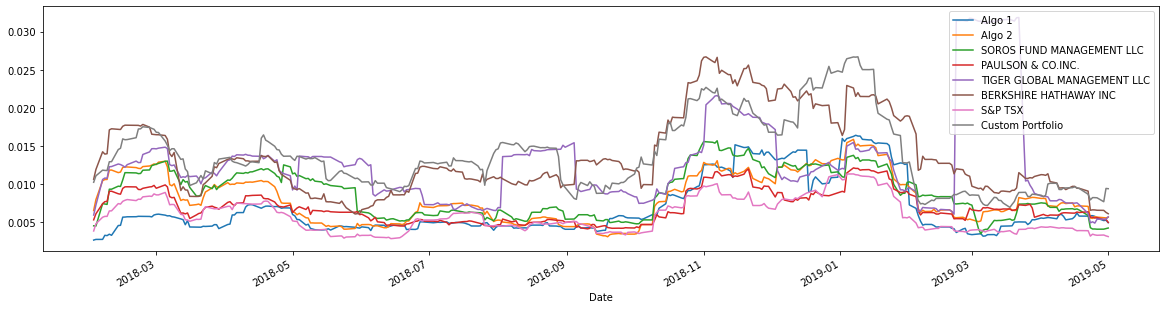

In [628]:
rolling_final_table_std = final_table.rolling(window = 21).std()
rolling_final_table_std.plot(figsize = (20,5))

In [629]:
#Calculate and plot the correlation

<AxesSubplot:>

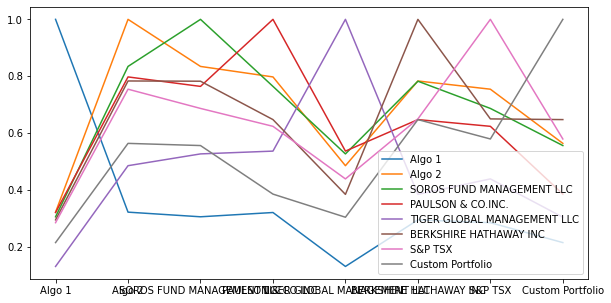

In [630]:
final_table.corr().plot(figsize = (10,5))

In [631]:
#Calculate and plot Beta

In [632]:
#To this we must first calculate the rolling covariance and variance

In [633]:
rolling_covariance_custom = final_table['Custom Portfolio'].rolling(window = 60).cov(final_table['Custom Portfolio'])

rolling_variance_sptsx = final_table['S&P TSX'].rolling(window = 60).var()



In [634]:
#Now we calculate the rolling beta

In [635]:
rolling_beta_final_table = rolling_covariance_custom / rolling_variance_sptsx

In [636]:
#Now we plot the beta

<AxesSubplot:title={'center':'Rolling Beta of Custom Portfolio and S&P TSX'}, xlabel='Date'>

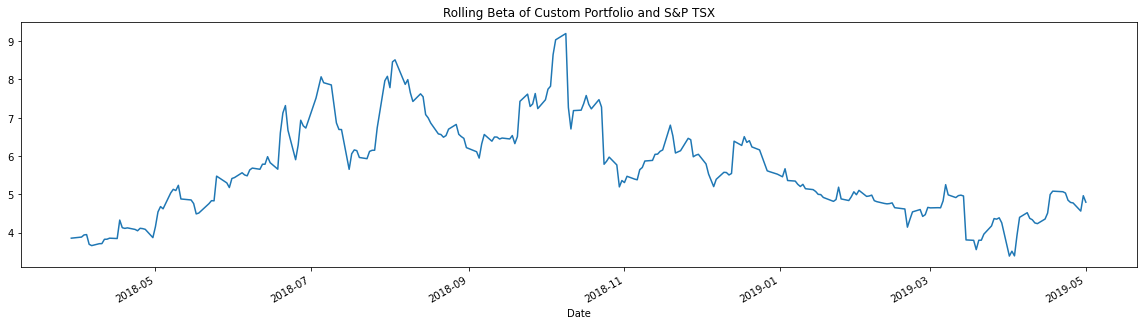

In [637]:
rolling_beta_final_table.plot(figsize = (20,5), title = 'Rolling Beta of Custom Portfolio and S&P TSX')

In [638]:
#Now we will calculate the sharpe ratios

In [639]:
sharpe_ratio_custom = (final_table.mean() * 252) / (final_table.std() * np.sqrt(252))
sharpe_ratio_custom

Algo 1                         1.901461
Algo 2                         0.021394
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
S&P TSX                        0.034651
Custom Portfolio               1.564547
dtype: float64

In [640]:
#Now we plot the sharpe ratio

<AxesSubplot:title={'center':'Sharpe Ratio of Final Table'}>

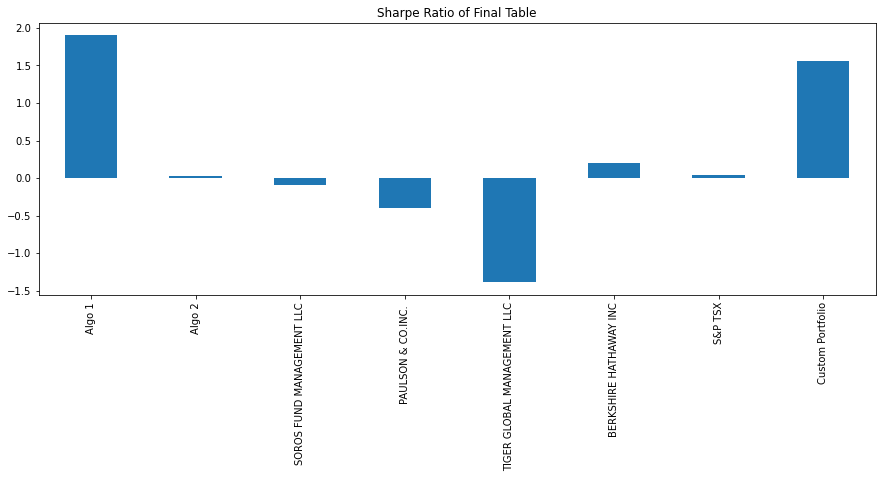

In [641]:
sharpe_ratio_custom.plot(kind = 'bar', figsize = (15,5), title = 'Sharpe Ratio of Final Table')

In [642]:
print('The portfolio does very well in comparison to all the others but is still not as strong as the Algo 1 portfolio')

The portfolio does very well in comparison to all the others but is still not as strong as the Algo 1 portfolio
